# ММО. Рубежный контроль №1

## Методы обработки данных.

### Вариант 1

**Борисочкин М. И. ИУ5-21М**

#### Текстовое описание набора данных

Для обучения по методу K ближайших соседей (KNN) был выбран датасет с классификацией типа звёзд c ресурса kaggle ([Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification))

В данном наборе данных присутствуют следующие столбцы:

- Temperature — температура звезды в Кельвинах;
- L (Luminosity) — светимость звезды в солнечных светимостях;
- R (Radius) — радиус звезды в радиусах солнца;
- A_M (Absolute Magnitude) — [абсолютная звёздная величина](https://ru.wikipedia.org/wiki/Абсолютная_звёздная_величина);
- Color — цвет света звезды;
- Spectral_Class — [спектральный класс звезды](https://ru.wikipedia.org/wiki/Спектральная_классификация_звёзд#Спектральные_классы);
- Type — тип звезды. Является целевым признаком и уже закодирован:
    - Красный карлик — 0;
    - Коричневый карлик — 1;
    - Белый карлик — 2;
    - Звезда из [главной последовательности](https://ru.wikipedia.org/wiki/Главная_последовательность) — 3;
    - Супергигант — 4;
    - Гипергигант — 5.

#### Импорт библиотек

In [1]:
from sklearn.preprocessing import RobustScaler
from category_encoders.count import CountEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

#### Загрузка данных

In [2]:
data = pd.read_csv('data/Stars.csv')
data.sample(10, random_state=1)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
228,23095,347820.000000,86.00000,-5.905,Blue,O,4
194,3523,0.005400,0.31900,12.430,Red,M,1
88,13720,0.000180,0.00892,12.970,white,F,2
95,11250,672.000000,6.98000,-2.300,Blue-white,A,3
214,34190,198200.000000,6.39000,-4.570,Blue,O,3
4,1939,0.000138,0.10300,20.060,Red,M,0
93,4980,0.357000,1.13000,4.780,Yellowish,K,3
27,7700,0.000110,0.01280,14.470,Yellowish White,F,2
170,3570,320000.000000,1480.00000,-7.580,Red,M,5
237,8829,537493.000000,1423.00000,-10.730,White,A,5


In [3]:
# Статистические характеристки датасета
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


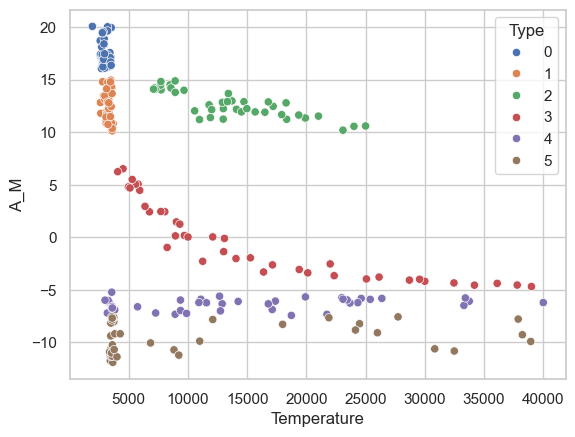

In [4]:
# Диаграмма рассеивания
sns.scatterplot(data=data, x="Temperature", y="A_M", hue="Type", palette="deep")
plt.show()

#### Задача №1

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".

Закодируем признак Color с помощью CountEncoder-а из библиотеки Category Encoders

In [5]:
data["Color"].value_counts()

Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64

Прежде чем кодировать значения поля Color, преобразуем схожие цвета в один конкретный.

In [6]:
# Cписок цветов под замену
colors = ['Blue-white', 'Blue White', 'Blue white', 'yellow-white', 'Yellowish White', 'yellowish', 'Yellowish', 'White-Yellow',
          'white', 'Whitish', 'Pale yellow orange', 'Orange-Red']

# Замена цветов
for i in range(len(data['Color'])):
    if data['Color'][i] in colors [:3]:
        data.loc[i, 'Color'] = 'Blue-White'
    elif data['Color'][i] in colors [3:8]:
        data.loc[i, 'Color'] = 'Yellow-White'
    elif data['Color'][i] in colors [8:10]:
        data.loc[i, 'Color'] = 'White'
    elif data['Color'][i] in colors [10:]:
        data.loc[i, 'Color'] = 'Orange'

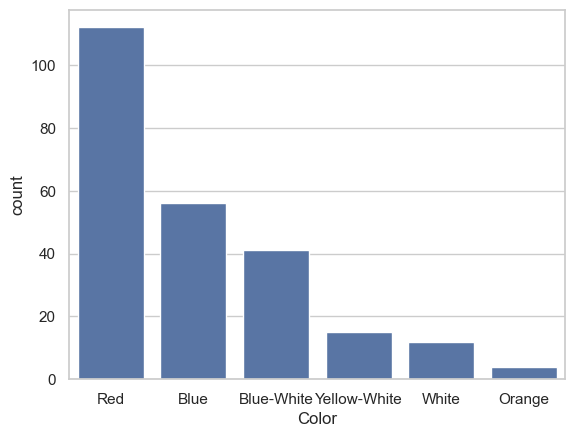

In [7]:
# До кодирования признака Color
sns.countplot(data=data, x='Color', order=data['Color'].value_counts().index)
plt.show()

Количество возможных цветов уменьшилось, но что более важно: все они встречаются с разной частотой, иначе говоря не будет коллизий при кодировании признака CountEncoder-ом.

In [8]:
# Применение Count Encoder для остальных категориальных признаков
data_coded = data.copy()
ce_Freq = CountEncoder(cols=["Color"])
data_coded = ce_Freq.fit_transform(data_coded)

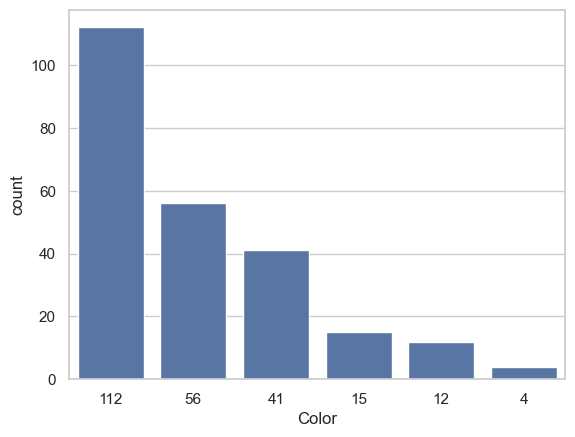

In [9]:
# После кодирования признака Color
sns.countplot(data=data_coded, x='Color', order=data_coded['Color'].value_counts().index)
plt.show()

Из графика, что удалось сохранить все изначальные значения (нет коллизий).

#### Задача №2

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

Отмасштабируем признак Temperature с помощью RobustScaler из библиотеки scikit-learn

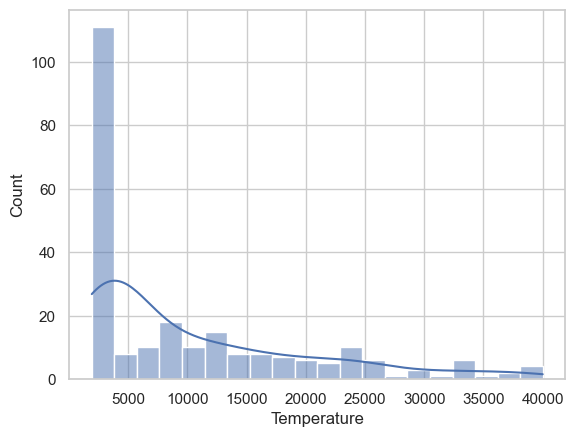

In [10]:
# До масштабирования признака Temperature
sns.histplot(data=data_coded, x='Temperature', kde=True, bins=20)
plt.show()

In [11]:
# Применение RobustScaler
robust_scaler = RobustScaler()
data_coded_scaled = data_coded.copy()

data_coded_scaled['Temperature'] = robust_scaler.fit_transform(data_coded_scaled[['Temperature']])

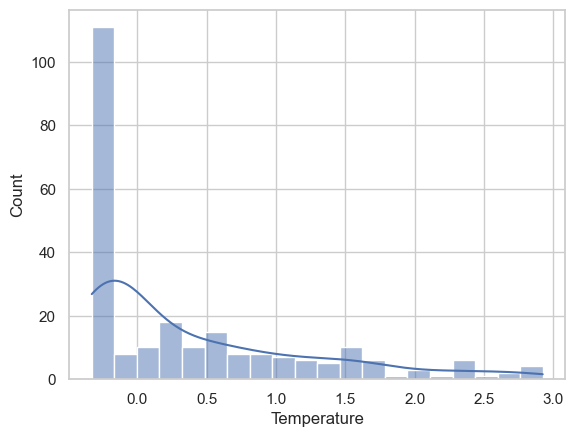

In [12]:
# После масштабирования признака Temperature
sns.histplot(data=data_coded_scaled, x='Temperature', kde=True, bins=20)
plt.show()

По результатам масштабирования видим, что масштаб изменился, а распределение осталось прежним.